###Nama : Syifa Apriyani
###NIM : 210401010048
###Mata Kuliah : Pengolahan Citra Digital
###Kelas : IFD51


In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
#load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=";")

In [31]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  ...    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9  ...  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6  ...  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3  ...  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9  ...  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9  ...  3.51       0.56      9.4        5

[5 rows x 12 columns]


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [33]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  ...    sulphates      alcohol      quality
count    1599.000000       1599.000000  1599.000000  ...  1599.000000  1599.000000  1599.000000
mean        8.319637          0.527821     0.270976  ...     0.658149    10.422983     5.636023
std         1.741096          0.179060     0.194801  ...     0.169507     1.065668     0.807569
min         4.600000          0.120000     0.000000  ...     0.330000     8.400000     3.000000
25%         7.100000          0.390000     0.090000  ...     0.550000     9.500000     5.000000
50%         7.900000          0.520000     0.260000  ...     0.620000    10.200000     6.000000
75%         9.200000          0.640000     0.420000  ...     0.730000    11.100000     6.000000
max        15.900000          1.580000     1.000000  ...     2.000000    14.900000     8.000000

[8 rows x 12 columns]


In [34]:
X = df.drop(columns=["quality"])

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

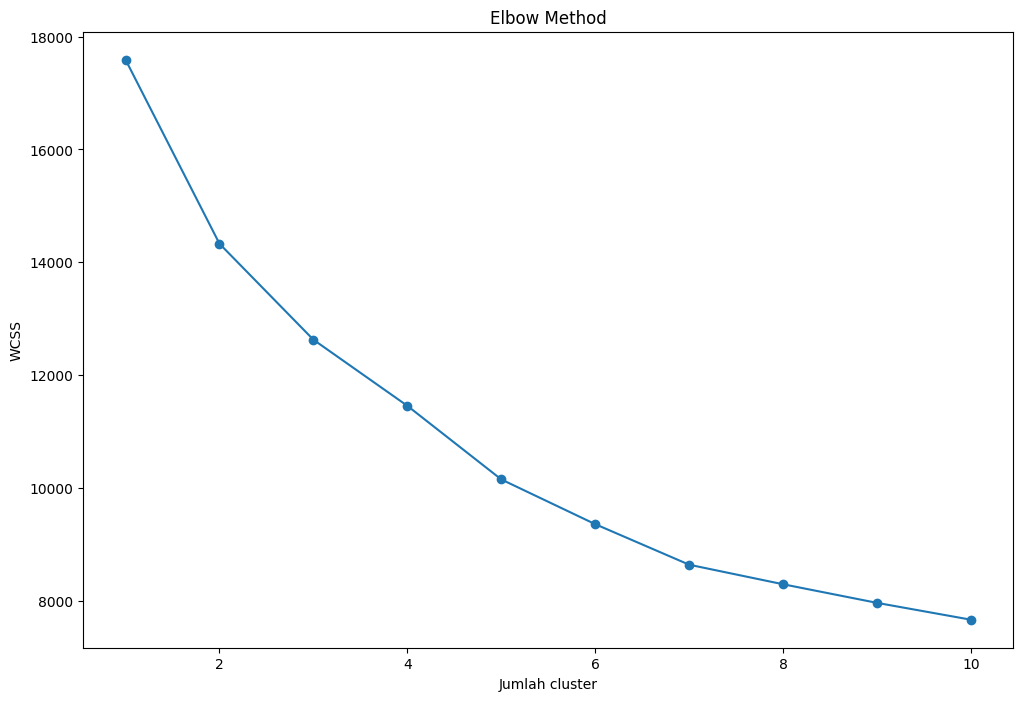

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Jumlah cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [38]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

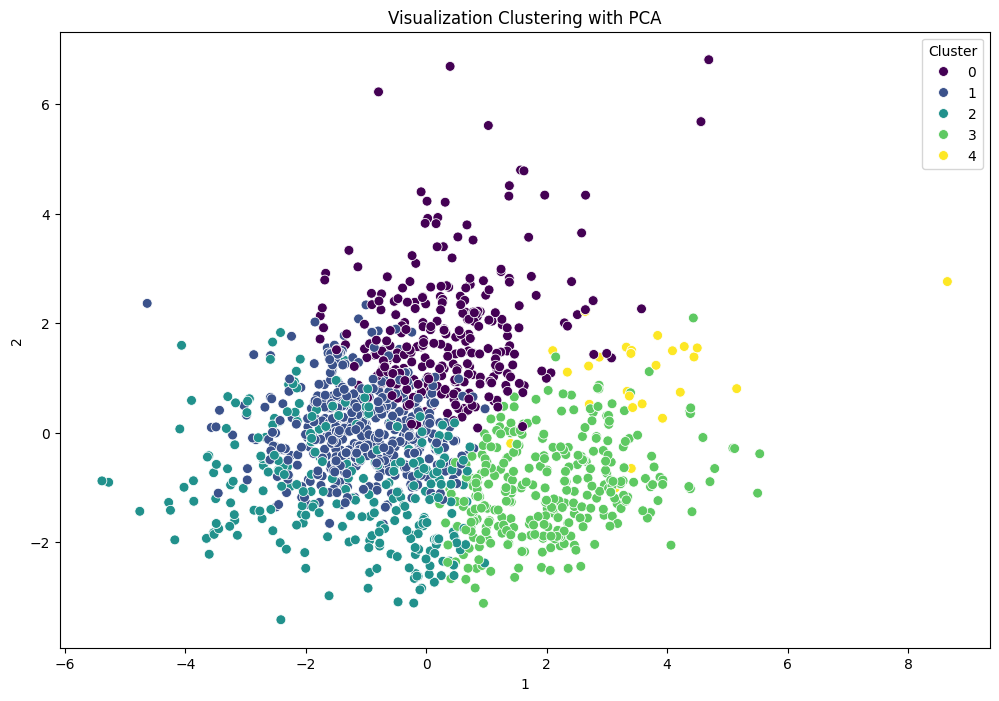

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="viridis", s=50)
plt.xlabel("1")
plt.ylabel("2")
plt.title("Visualization Clustering with PCA")
plt.legend(title="Cluster")
plt.show()

In [41]:
cluster_means = df.groupby("Cluster").mean()
print(cluster_means)

         fixed acidity  volatile acidity  citric acid  ...  sulphates    alcohol   quality
Cluster                                                ...                                
0             8.243917          0.534377     0.296617  ...   0.630653   9.842532  5.341246
1             7.498011          0.649376     0.114810  ...   0.590615   9.949699  5.332731
2             7.107395          0.447781     0.241254  ...   0.680257  11.752304  6.151125
3            10.622973          0.407419     0.488595  ...   0.718568  10.611802  5.945946
4             8.485714          0.528214     0.501071  ...   1.278929   9.496429  5.357143

[5 rows x 12 columns]
